# Lecture 2: Everything You Always Wanted to Know About Differential Equations*
(*But Were Afraid to Ask)

### To be learned:

* What is a PDE
* Derive a DE (differential equation) for a system of masses and springs
* finite difference method (FDM)
* order of approximation
* how to numerically solve a DE 

## Why PDEs?

PDEs (Partial Differential Equations) are imporant because:

* modeling almost any physical phenomenon involves differential equations
* almost any other physical phenomena involve integral equations


## Typical example of using numerical methods for PDEs

<img width="700" src="fig/conn_rods.png" />

[<a href="http://www.ima.umn.edu/~arnold//8445.f11/notes.pdf#page=8">source</a>]

### Another example of using numerical methods for PDEs

### where an error caused $700 million

<img width="700" src="fig/failure-2.png" />

[<a href="http://www.ima.umn.edu/~arnold//disasters/sleipner.html">more details</a>] [<a href="http://www.ima.umn.edu/~arnold//8445.f11/notes.pdf#page=9">source</a>]

### In image processing

Check out an interesting lecture <a href="http://cvrr.ucsd.edu/eshed/class/PDEsandIP.pdf#page=6">here</a>

## Basics

### Derivative

You should know what is:

* a <a href="http://en.wikipedia.org/wiki/Derivative">derivative</a>, and
* a <a href="http://en.wikipedia.org/wiki/Partial_derivative">partial derivative</a>.

### PDEs

* PDE = equation involving partial derivatives (see also an ODE).

* An examples of a PDE:

$$ \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}, $$

where $u(t,x,y)$ is an unknown function (e.g., the temperature) that depends on time $t$ and space $x,y$.

### Modeling with DEs (Differential Equations)

Let us model stretching a guitar string:
<img width="300" src="fig/guitar_string_stretch.jpg">

Consider a system of $N$ springs and $N+1$ masses:

<img width="400" src="fig/springs.png">
$i$-th mass is being pulled with the force $F_i$.


* distance between masses: $h = 1/N$ (assuming that the length of the string is $1$).
* Positions of the masses are $x_i = i h$ fixed, and $y_i$ to be found.
* Elongation of each spring is $e_i = ((x_{i+1}-x_i)^2+(y_{i+1}-y_i)^2)^{1/2} = (h^2+(y_{i+1}-y_i)^2)^{1/2}$.
* Assuming that all $y_i$ are small (compared to $h$), $e_i \approx h (1+(y_{i+1}-y_i)^2/(2 h^2))$
* Recall that the energy of a spring is $k e_i^2/2$, where $k$ is the spring constant.
* Total energy:
$$
E = \frac{k}{2} + \frac{k h}{2} \sum_{i=0}^{N-1} (y_{i+1}-y_i)^2/(2 h^2)
$$

* Internal force on $j$-th mass:
$$
f_j = -\frac{\partial E}{\partial y_j} = \frac{k}{2 h^2} \big(
	(y_{j+1}-y_j) - (y_{j}-y_{j-1}) \big)
= \frac{k}{2 h^2}  (y_{j+1}-2 y_j + y_{j-1})
$$

* Equilibrium (force balance):
$$
F_j = -f_j = \frac{k}{2 h^2} (-y_{j+1}+2 y_j - y_{j-1})
$$

* We know that if $y_j = u(j h)$, where $u$ is a smooth function then
$$
0 = h^{-2} (y_{j+1}-2 y_j + y_{j-1}) \approx u''(hj).
$$
Hence if also $F_j = F(j h)$ then we have
$$
\frac{k}{2} u'' = F
$$
as a model.
Here $F$ is, strictly speaking, a force per unit length.

* **Homework**: did we do the limit $h\to 0$ correctly?

### a PDE

<img width="400" src="fig/springs_sheet.png">

* Force balance:
$$
h^{-2} (u_{i+1,j} - 2 u_{i,j} + u_{i-1,j} + u_{i,j+1} - 2 u_{i,j} + u_{i,j-1})
= -F_{i,j}
$$
which approximates
$$
\Delta u = -F,
$$
where $\Delta = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}$

* This equation models a membrane.
* This is called a **Poisson equation**
* $\Delta$ is called a **Laplacian**

### A boundary-value problem (BVP)

To solve a PDE we need:
* A domain $\Omega$ (say, a unit square)
* **Boundary conditions**. They describe what we do with the boundary masses.
* **Dirichlet**: fixing the positions of masses (often to be zero): $u|_{\Gamma} = 0$ ($\Gamma = \partial\Omega$ is the boundary of the domain $\Omega$)
* **Neumann** (also known as free): leaving their (vertical) position free. This corresponds to setting $\frac{\partial u}{\partial n} = 0$ on $\Gamma$.

* In general, one may have a non-zero RHS (right-hand side), e.g., $u|_{\partial\Omega} = g$, where $g$ is a known function.

### Example of BPV

$$
\begin{align*}
\Delta u = f\qquad&\text{on }\Omega
\\
u = 0\qquad&\text{on }\Gamma
\end{align*}
$$
(here $f$ is the new notation, nothing to do with the force from above)

* What does this equation describe?

### Solving a BVP numerically

Steps:
* Discretize a function (and a domain)
* Discretize the equations
* Solve

## Solving a BVP with Finite Differences

### Discretize a domain:

* Choose $h$---grid step size

* Grid is points "that are multiples" of $h$ (also called a *mesh*).
We denote it as $${\mathbb R}^2_h := \{(x_1,x_2) : x_1/h\in{\mathbb R}, x_2/h\in{\mathbb R}\}$$

* Discrete domain:
$$
\Omega_h := \Omega \cap {\mathbb R}^2_h
$$

* Discrete boundary:
$$
\Gamma_h := \Gamma \cap {\mathbb R}^2_h
$$

<center><img width=200 src="fig/grid.png"></center>

<center>Black points = $\Omega_h$, <span style="color: blue">blue points</span> = $\Gamma_h$</center>

* Why "multiples" are in quotes?

* How to read the definition of $\Omega_h$?

### Discretize a function:

* A continuous function $u(x,u)$ is approximated by $u_h$ with values on $(x,y)\in\Omega_h$.

### Discretize the equation:

* We need to discretize the operator $\Delta = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}$
* Recall that for $g=g(x)$,
$$
\frac{d^2 f}{dx^2} = \frac{g(x-h)-2g(x)+g(x+h)}{h^2} + O(h^2)
$$

* Exercise: prove it by Taylor series:
$$
g(x+\xi) = g(x) + \xi g'(x) + \frac{\xi^2}{2} g''(x) + \frac{\xi^3}{6} g'''(x) + O(\xi^4)
$$
<small>(refresh the <a href="http://en.wikipedia.org/wiki/Big_O_notation">Big-O</a> notation if you need)</small>

* Hence
$$
\Delta u = \Delta_h u + O(h^2),\qquad\text{where}
$$
$$
\Delta_h u := \frac{u(x-h,y)+u(x+h,y)+u(x,y+h)+u(x,y-h)-4u(x,y)}{h^2}.
$$

* Thus, the **discretized equation** is
$$
\frac{u(x-h,y)+u(x+h,y)+u(x,y+h)+u(x,y-h)-4u(x,y)}{h^2} = f(x,y)
\qquad (x,y)\in\Omega_h
$$

* Discrete boundary conditions are easy:
$$
u(x,y) = 0
\qquad (x,y)\in\Gamma_h
$$

* This is a **system of linear equations SLE** on $u(x,y)$ for $(x,y)\in\Omega_h\cap\Gamma_h$.

* Exercise: Let $h=1/n$ how many unknowns and equations are there?

### Order of Approximation

* Because the error is $O(h^2)$, we say that $\Delta_h u$ is approximates $\Delta u$ with the **second order**.
* In othre words, we have the **second order of approximation**.

### SLE

* Let us do it for $n=4$. We have 9 unknowns (Exercise: write them down)
* It is easier to denote them $u_{1,1},u_{1,2},\ldots,u_{3,3}$ (where $u_{i,j} = u(h i, h j)$).
* We have 9 equations of the form $\Delta_h u(x,y)=0$, $(x,y)\in\Omega_h$.
* If we collect the unknowns in a vector, we will have a linear system
\\[
\frac{1}{h^2}
\begin{pmatrix}
-4 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
 1 &-4 & 1 & 0 & 1 & 0 & 0 & 0 & 0 \\
 0 & 1 &-4 & 0 & 1 & 0 & 0 & 0 & 0 \\
 1 & 0 & 0 &-4 & 1 & 0 & 1 & 0 & 0 \\
 0 & 1 & 0 & 1 &-4 & 1 & 0 & 1 & 0 \\
 0 & 1 & 0 & 0 & 1 &-4 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1 & 0 & 0 &-4 & 1 & 0 \\
 0 & 0 & 0 & 0 & 1 & 0 & 1 &-4 & 1 \\
 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 &-4 \\
\end{pmatrix}
\begin{pmatrix}
u_{1,1} \\ u_{1,2} \\ u_{1,3} \\ u_{2,1} \\ u_{2,2} \\ u_{2,3} \\ u_{3,1} \\ u_{3,2} \\ u_{3,3}
\end{pmatrix}
=
\begin{pmatrix}
f_{1,1} \\ f_{1,2} \\ f_{1,3} \\ f_{2,1} \\ f_{2,2} \\ f_{2,3} \\ f_{3,1} \\ f_{3,2} \\ f_{3,3}
\end{pmatrix}
\\]

* Exercise: guess how $f_{i,j}$ is defined

#### Block structure

* The matrix has a block form
$$
\begin{pmatrix}
A & I & O \\
I & A & I \\
O & I & A
\end{pmatrix}
,
$$
where $I$ is the 3x3 identity matrix, $O$ is the zero matrix, and
$$A = \begin{pmatrix}
-4 & 1 & 0 \\
 1 &-4 & 1 \\
 0 & 1 &-4
\end{pmatrix}
$$

* In general, the matrix contains $(n-1)\times(n-1)$ blocks (most of the blocks are zero), each block is an $(n-1)\times(n-1)$ matrix:
$$
\frac{1}{h^2}
\begin{pmatrix}
A & I & O & \cdots & O & O\\
I & A & I & \cdots & O & O\\
O & I & A & \cdots & O & O\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
O & O & O & \cdots & A & I \\
O & O & O & \cdots & I & A \\
\end{pmatrix}
,
$$
And the $(n-1)\times (n-1)$ matrix $A$ has a tridiagonal structure with $-4$ on the diagonal and $1$ above and below the diagonal.


** TODO **: write a python code that solves and plots the solution for $f\equiv 1$. Would be good to use the Kronecker product

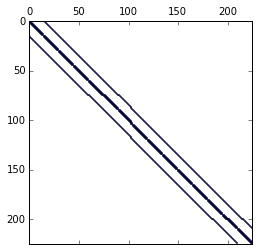

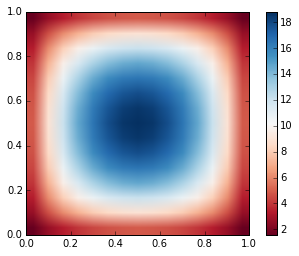

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import matplotlib.cm as cm
%matplotlib inline

#Problem size:
N = 15

# Making A without Kronecker product:
def lap2d(N):
    import  pyamg
    return sp.sparse.csr_matrix(pyamg.gallery.laplacian.poisson((N,N)))
A = lap2d(N)

# Making A with kronecker product
# Making 1D operator:
B = np.diag(2*np.ones(N))  + np.diag((-1)*np.ones(N-1),k=-1)+ np.diag((-1)*np.ones(N-1),k = 1)
Id = np.diag(np.ones(N));
# Making 2D operator:
A = np.kron(Id,B) + np.kron(B,Id)

# Fig. of A
plt.spy(A,markersize=20/N)

# Right hand side
f = np.ones(N**2)

# Solution
x = sp.sparse.linalg.spsolve(A,f)
Sq_x = x.reshape((N, N))
#print Sq_x

#Fig. of solution
fig, ax = plt.subplots()

im = ax.imshow(Sq_x, cmap=cm.RdBu, vmin=abs(Sq_x).min(), vmax=abs(Sq_x).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

## Methods of solving the SLE

* Full Gaussian Elimination: $O(N^3)$---no one does that anymore ($N=n^2$ in 2D and $N=n^3$ in 3D)
* Elimination using sparsity: $O(N^{3/2})$ in 2D---ok; $O(N^2)$ in 3D---too much!
* Fast Fourier Transform: $O(N \log(N))$---very good, but not always applicable (requires a square domain)
* Multigrid: $O(N)$

### Suggested literature:

* <a href="http://www.ima.umn.edu/~arnold//8445.f11/notes.pdf">Lecture notes on Numerical Analysis of Partial Differential Equations</a>, Chapters 1 and 2. (Beware: mathematics.)

##### Questions?

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

